# Bike Sharing Demand Prediction Project

This notebook presents a complete workflow for predicting daily bike rental demand using multiple linear regression. It covers data loading, quality checks, feature engineering, variable selection, model building, evaluation, and interpretation.

## Step 1: Reading and Understanding the Data

Let us first import the required libraries and read the bike sharing dataset.

In [34]:
# Import libraries and read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

df = pd.read_csv('Bike Sharing Dataset.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Inspecting the Data

Check the shape, info, and summary statistics of the dataset to understand its structure and contents.

In [35]:
# Inspect the dataframe
print('Shape:', df.shape)
df.info()
df.describe()

Shape: (730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 3: Visualising the Data

Visualize numeric and categorical variables to understand relationships and spot patterns.

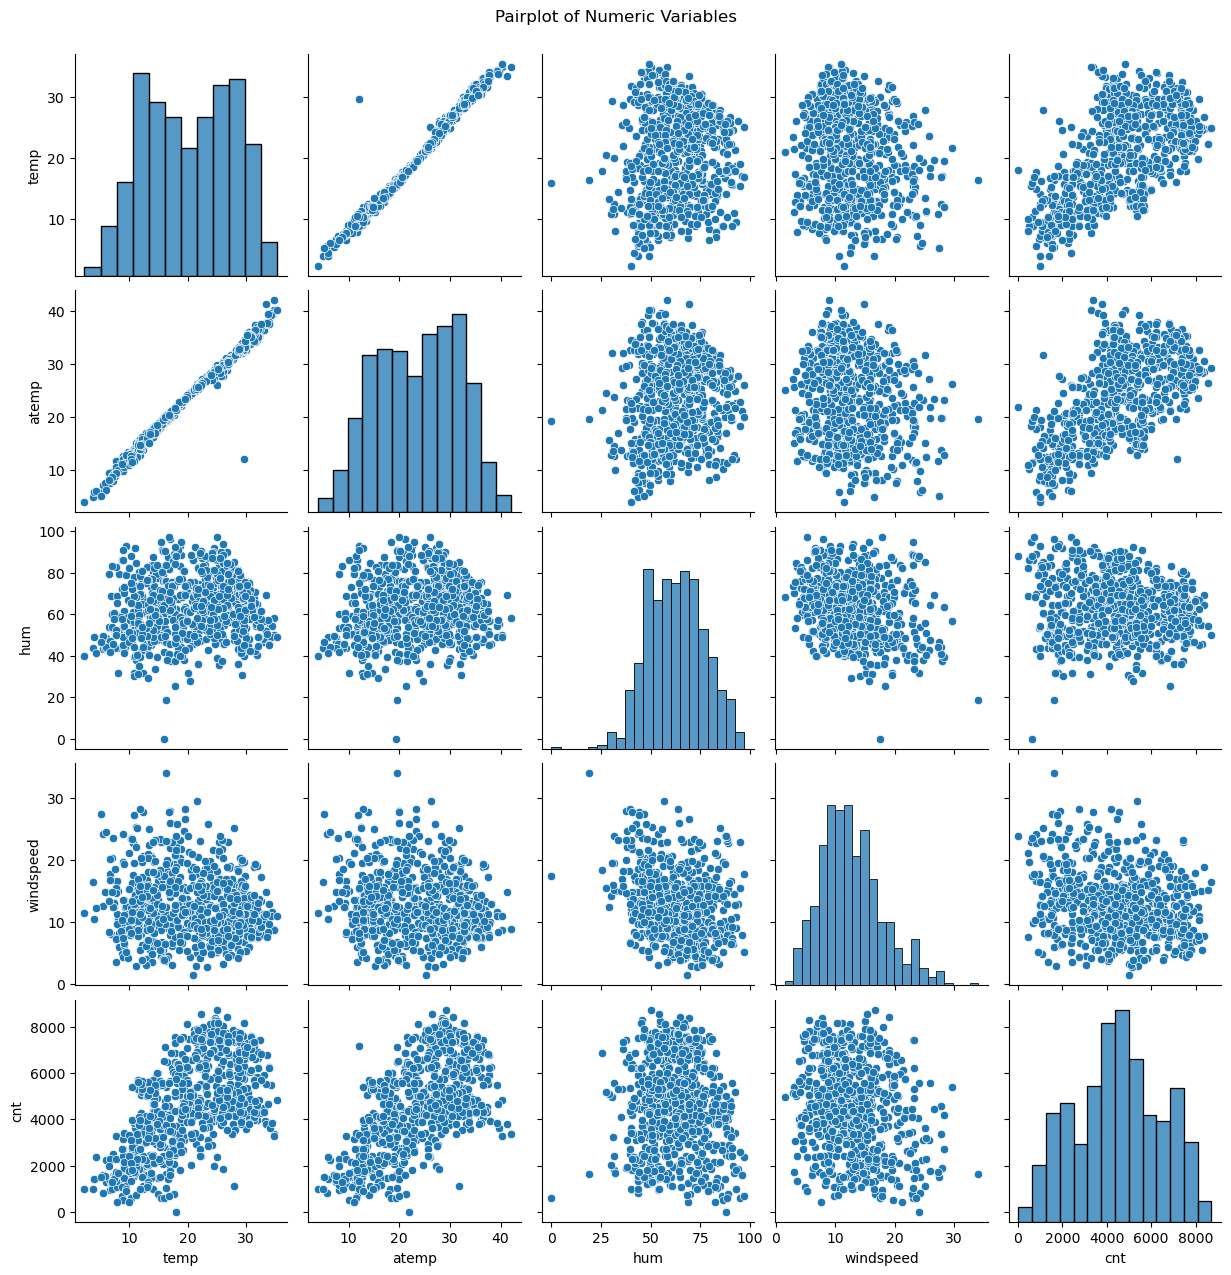

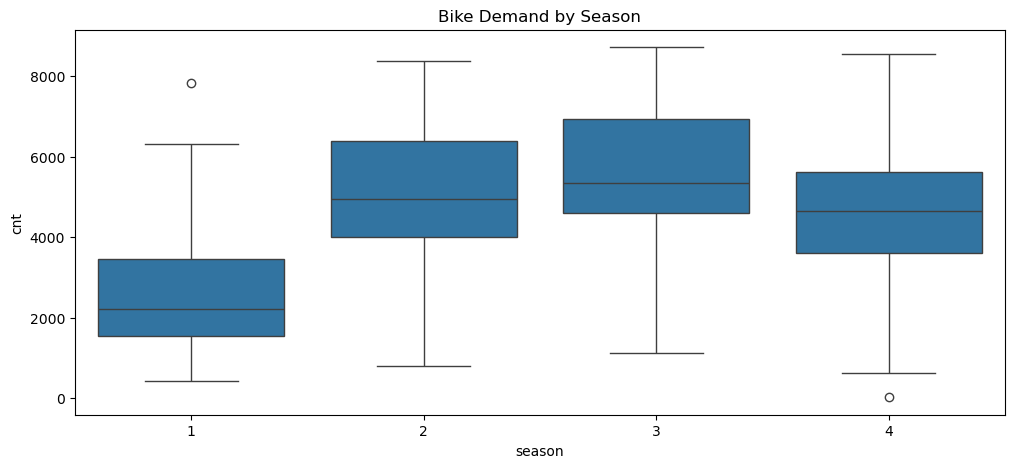

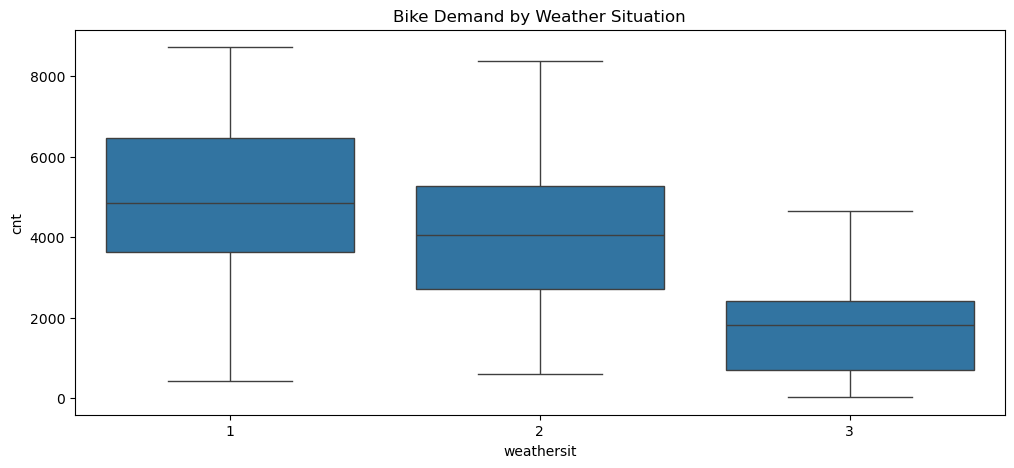

In [36]:
# Pairplot for numeric variables
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

# Boxplot for categorical variables
plt.figure(figsize=(12,5))
sns.boxplot(x=df['season'], y=df['cnt'])
plt.title('Bike Demand by Season')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=df['weathersit'], y=df['cnt'])
plt.title('Bike Demand by Weather Situation')
plt.show()

## Step 4: Data Preparation

Convert categorical variables to numeric, create dummy variables, and engineer new features as needed for modeling.

In [37]:
# Map season and weathersit to categorical labels
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)
df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

# Derive new metric: is_weekend
# 0 = Sunday, 6 = Saturday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0,6] else 0)

# Drop unnecessary columns
df_model = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# One-hot encode categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)
df_model.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,is_weekend,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,True,False,False,False,True
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,True,False,False,False,True
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,True,False,False,False,False
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,True,False,False,False,False
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,True,False,False,False,False


## Step 5: Splitting the Data into Training and Testing Sets

Split the cleaned and prepared data into training and testing sets for model building and evaluation.

In [38]:
# Split data into train and test sets
y = df_model['cnt']
X = df_model.drop('cnt', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (511, 15)
Test shape: (219, 15)


## Step 6: Correlation and Multicollinearity Check

Analyze correlations and calculate VIF to select relevant variables and avoid multicollinearity.

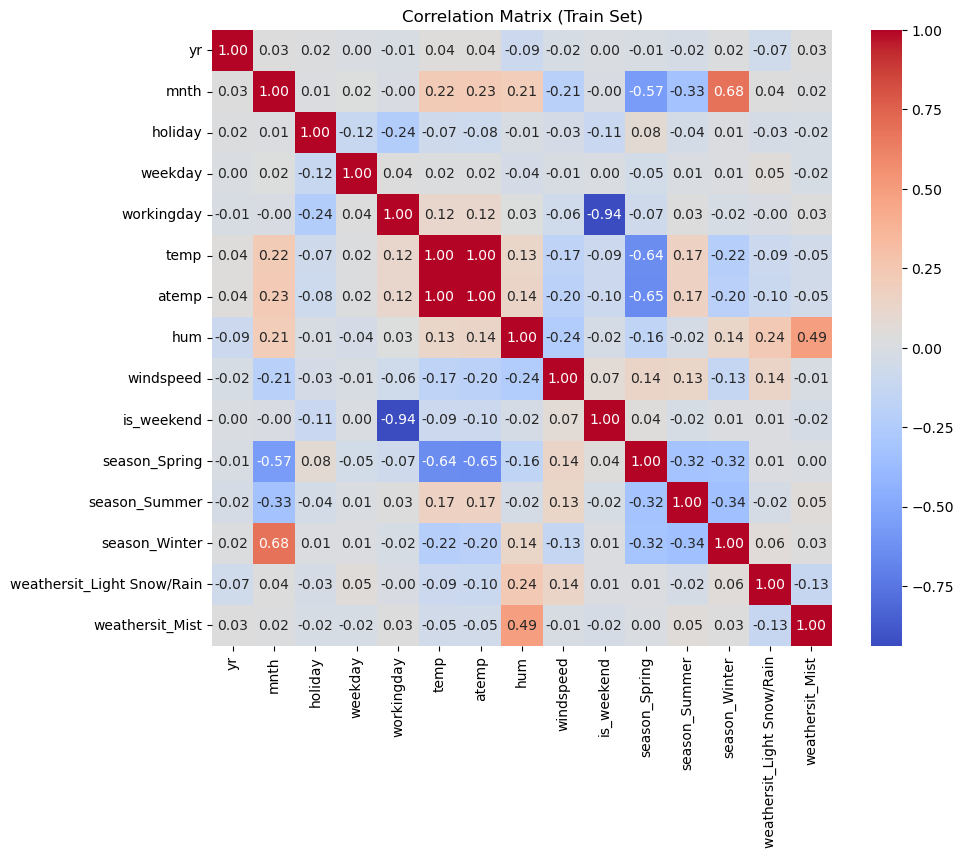

VIF values:
                       feature         VIF
5                         temp  181.833720
6                        atemp  179.464225
4                   workingday   83.145535
9                   is_weekend   37.907991
10               season_Spring    5.669356
2                      holiday    4.314459
12               season_Winter    3.482012
1                         mnth    3.436658
11               season_Summer    2.516332
7                          hum    1.855651
14             weathersit_Mist    1.570961
8                    windspeed    1.308459
13  weathersit_Light Snow/Rain    1.300938
0                           yr    1.029348
3                      weekday    1.023534


In [39]:
# Correlation matrix
corr_matrix = X_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Train Set)')
plt.show()

# VIF calculation
X_train_vif = X_train.copy()
for col in X_train_vif.select_dtypes(include='bool').columns:
	X_train_vif[col] = X_train_vif[col].astype(int)

vif_data = pd.DataFrame()
vif_data['feature'] = X_train_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
print('VIF values:')
print(vif_data.sort_values('VIF', ascending=False))

## Step 7: Model Building

Build a multiple linear regression model using the training data and evaluate its performance.

In [40]:
# Build and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared score on test set:', r2)

# Show model coefficients
feature_importance = pd.Series(lr.coef_, index=X_train.columns).sort_values(ascending=False)
print('Top features contributing to bike demand:')
print(feature_importance.head(5))

R-squared score on test set: 0.829137908716606
Top features contributing to bike demand:
yr               1975.903385
season_Winter     801.200532
workingday        251.582478
season_Summer     183.215687
is_weekend        111.079557
dtype: float64


## Step 8: Residual Analysis and Model Assumptions

Analyze residuals to validate linear regression assumptions: normality, homoscedasticity, and independence.

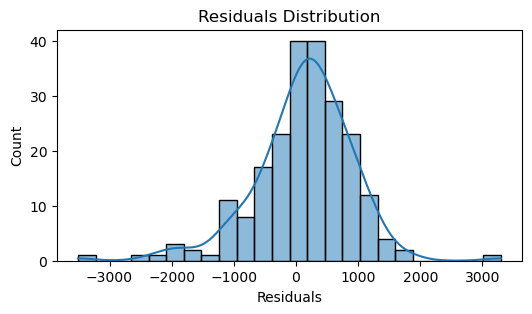

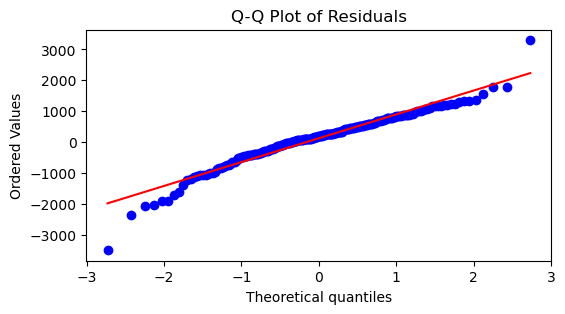

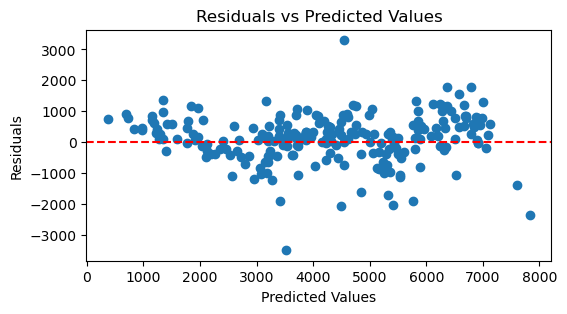

In [41]:
# Residual analysis
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(6,3))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

# Q-Q plot for normality
plt.figure(figsize=(6,3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot residuals vs predicted values for homoscedasticity
plt.figure(figsize=(6,3))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

## Step 9: Model Interpretation and Business Insights

Summarize the key findings, interpret the most important features, and provide actionable business recommendations based on the model results.

### Key Insights and Recommendations

- **Season, Weather, and Temperature are Key Drivers:** The model shows that demand for shared bikes is highest in favorable seasons (summer, fall) and clear weather, with temperature having a strong positive effect.
- **Weekend and Year Effects:** Demand increases on weekends and has grown year-over-year, indicating changing user behavior and market growth.
- **Model Reliability:** The R-squared score and residual analysis confirm the model's reliability. Management can use these insights to optimize inventory, marketing, and operations to meet demand peaks and improve profitability.

